# Entendendo e Aplicando Funcão Lambda 

#### Python suporta funções que não são associadas a um nome em tempo de execução, utilizando um conceito chamado "Lambda".

### Criando valores para testes

In [1]:
valor=10

In [2]:
minhaLista = [-2,8,10,0]

### Criando uma função  que soma o número dez a uma lista de valores repassados

Observe que lambda cria uma funcao generica sem nome associado. Mas se necessário podemos associar a uma variavel e teremos o resultado embutido por meio desta variavel

In [3]:
f = lambda x:x+10
f(valor)

20

Trabalhando com lambda e listas

In [4]:
[(lambda x: x+10)(x) for x in minhaLista]

[8, 18, 20, 10]

#### Outra forma é utilizando map que será explicado mais a frente

In [5]:
map(lambda x:x+10,minhaLista)

[8, 18, 20, 10]

### Criando uma funcao que tem lambda internamente usado para criar novas funcoes

Isto será util quando quisermos criar uma funcao em tempo de execucao que depende de parametros repassados por um dado processamento anterior

In [6]:
def incrementador_parametrizado(incremento):
    return lambda x: x + incremento

In [7]:
minha_funcao_inc_2 = incrementador_parametrizado(2)
minha_funcao_inc_2(10)

12

In [8]:
minha_funcao_inc_12=incrementador_parametrizado(12)
minha_funcao_inc_12(10)

22

## Funcoes Lambda como filter, map e reduce

In [9]:
minhaLista2 =[-2, 8, 10, 0, 3, 5, 7]

### Lambda com Filter

#### Filtrar os valores onde x maior que 5

In [10]:
print(filter(lambda x:x>5,minhaLista2))

[8, 10, 7]


#### Filtrar os valores onde x é divisivel por 2

Observe que a funcao lambda retornara os resultados validos como sendo aqueles que retornam true (ou 1). Por isso devemos fazer x%2==0 (pois quando ocorre a divisão e temos mod igual a zero o número é divisivel por 2).

In [11]:
filter(lambda x:x%2==0,minhaLista2)

[-2, 8, 10, 0]

#### Filtrar os valores onde x nao é divisivel por 2 

(aqui temos uma particularidade interessante pois a funcao mod (%) retorna zero (0) onde for divisivel por dois. Como 0 representa false, somente onde não for divisivel por 2 e que teremos o resultado de filter.

In [12]:
filter(lambda x:x%2,minhaLista2)

[3, 5, 7]

#### obtendo números impares

In [13]:
2%10

2

Explicando a funcão:  o loop 'for' criará várias funcoes semelhantes as observadas abaixo para cada valor de i no intervalo range. Suponha que tenhamos range(2,5) gerariamos as seguintes funções:

In [14]:
f2=lambda x: x == 2 or x % 2
f3=lambda x: x == 3 or x % 3
f4=lambda x: x == 4 or x % 4
f5=lambda x: x == 5 or x % 5
f6=lambda x: x == 6 or x % 6

Se utilizarmos cada uma das funcoes com valores independentes em um loop de 2 a 6 teriamos o seguinte:

In [15]:
print('funcoes 2 a 5 de valor 2')
print(f2(2))
print(f3(2))
print(f4(2))
print(f5(2))
print(f6(2))
print ("============")

print('funcoes 2 a 5 de valor 3')
print(f2(3))
print(f3(3))
print(f4(3))
print(f5(3))
print(f6(3))
print ("============")

print('funcoes 2 a 5 de valor 4')
print(f2(4))
print(f3(4))
print(f4(4))
print(f5(4))
print(f6(4))
print ("============")

print('funcoes 2 a 5 de valor 5')
print(f2(5))
print(f3(5))
print(f4(5))
print(f5(5))
print(f6(5))

print ("============")

print('funcoes 2 a 5 de valor 5')
print(f2(6))
print(f3(6))
print(f4(6))
print(f5(6))
print(f6(6))

funcoes 2 a 5 de valor 2
True
2
2
2
2
funcoes 2 a 5 de valor 3
1
True
3
3
3
funcoes 2 a 5 de valor 4
0
1
True
4
4
funcoes 2 a 5 de valor 5
1
2
1
True
5
funcoes 2 a 5 de valor 5
0
0
2
1
True


observe que toda vez que aparecer valor =  true significa que o número apresentado é divisível pelo seu proprio valor. Entretanto caso o zero apareca antes do true, a funcao é quebrada pois obteve valor zero

In [16]:
nums = range(2, 7) 
for i in range(2, 6): 
     nums = filter(lambda x: x == i or x % i, nums)
print nums


[2, 3, 5]


In [17]:
filter(lambda x:x, [1,0])

[1]

Observe então que utilizando filter somente quando houver valor 'True' retornado é que não aparece o zero anteriormente é que o valor será repassado 

In [18]:
for i in range(16):
    for y in range(4):
        if y==i:
            print('igual',i)
            break
        #elif (y%i)==0:
        #    print('zero',i)
        #    #break
        elif (y%i)<>0:
            print(i)
            

('igual', 0)
('igual', 1)
2
('igual', 2)
3
3
('igual', 3)
4
4
4
5
5
5
6
6
6
7
7
7
8
8
8
9
9
9
10
10
10
11
11
11
12
12
12
13
13
13
14
14
14
15
15
15


In [19]:
i=3
res=filter(lambda x:x==i or x%i,[1,2,3,4])
res

[1, 2, 3, 4]

In [20]:
lista = range(2,17)
for i in range(2,5):
    lista=filter(lambda x:x==i or x%i, lista)
    #if not((lista[i]==i) or (lista[i]%i)):
    #    print(i)
lista

[2, 3, 5, 7, 11, 13]

### Lambda com Map

#### Map aplica uma funcão a todos os itens de uma lista de entrada

Frequentemente desejamos passar um todos os elementos por uma função e coletar ao final o resultado como abaixo

In [21]:
minhaLista = [-2, 8, 10, 0]
squared = []
for i in minhaLista:
    squared.append(i**2)
print(squared)

[4, 64, 100, 0]


Podemos fazer isso mais rapidamente com uso da funcao map e lambda

In [22]:
map(lambda x:x**2,minhaLista)

[4, 64, 100, 0]

Observe que temos os mesmos resultados com apenas uma linha de código!

Neste caso utilizamos portando lambda como sendo uma funcao para o mapeamento de um dado conjunto inicial resultando em outro conjunto final. Segue outro exemplo abaixo.

In [23]:
map(lambda x:x+15,minhaLista2)

[13, 23, 25, 15, 18, 20, 22]

### Ampliando as possibilidades com map

Partindo para um contexto mais interessante, podemos usar o mapeamento para um conjunto de funcoes (lista de funcoes) ao inves de um conjunto de dados (lista de dados) 

In [24]:
numero1=10
numero2 =1
def eleva_quadrado (numero):
    return numero*numero
def eleva_cubo (numero):
    return numero*numero*numero
def soma_10(numero):
    return numero+10
def seg_grau(numero):
    return pow(numero,2)+10
    

funcoes=[eleva_quadrado,eleva_cubo,soma_10,seg_grau]

for i in range(1,5):
    #calcula resultado para cada funcao
    res = (map(lambda x:x(i),funcoes))
    print(res)

[1, 1, 11, 11]
[4, 8, 12, 14]
[9, 27, 13, 19]
[16, 64, 14, 26]


É possível ainda, encadear funcoes recebidas e executar procedimentos mais avancados. Vamos criar agora um segundo conjuntos de funcoes que receberá o resultado das primeiras e criará em tempo de execucao os graficos resultantes

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
def grafico1(lista_dados):
    plt.plot(lista_dados)
    plt.figure()

def grafico2(lista_dados):
    plt.pie(lista_dados)
    plt.legend(lista_dados)
    plt.figure()

Agora vamos pegar o resultado obtido no mapeamento das primeiras funcoes e usar como resultado para as funcoes dos graficos que desejamos. Observe que obteremos nossos gráficos em tempo de execucao para cada conjunto de valores desejado.

Antes insert [1, 1, 11, 11]
Apos insert [1, 1, 1, 11, 11]
Antes insert [4, 8, 12, 14]
Apos insert [2, 4, 8, 12, 14]
Antes insert [9, 27, 13, 19]
Apos insert [3, 9, 27, 13, 19]


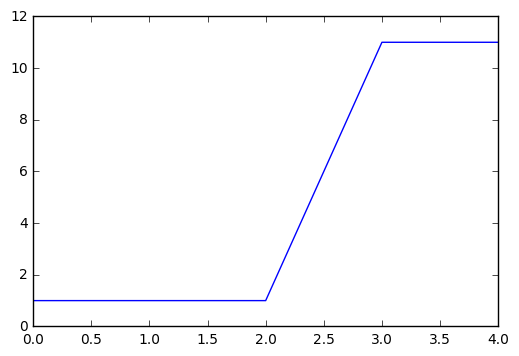

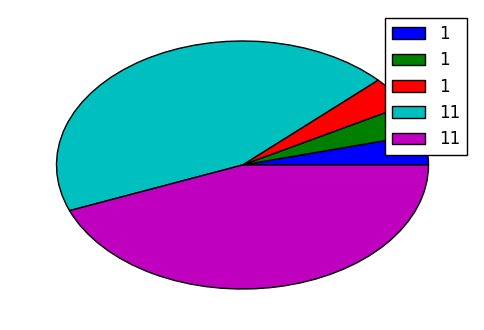

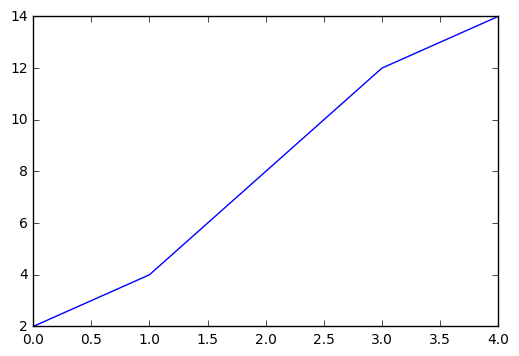

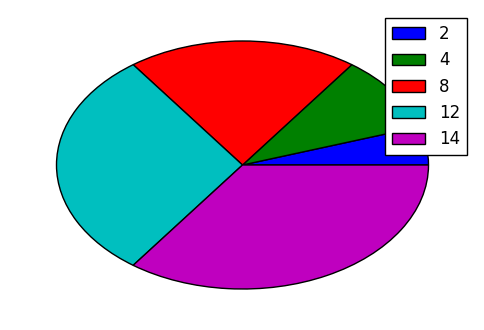

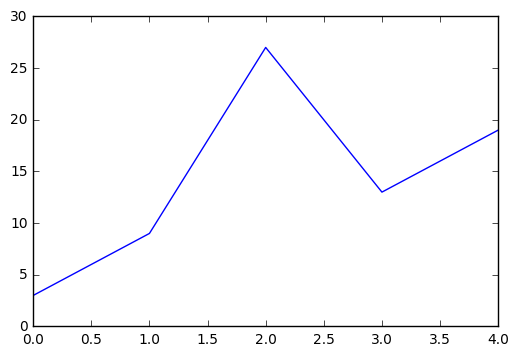

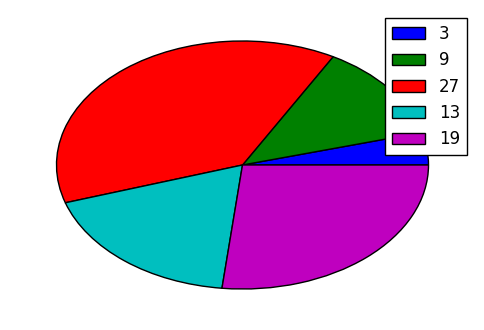

In [26]:
funcoes=[eleva_quadrado,eleva_cubo,soma_10,seg_grau]
funcoes2=[grafico1,grafico2]

for i in range(1,4):
    #calcula resultado para cada funcao
    res = list((map(lambda x:x(i),funcoes)))
    print("Antes insert %s"%res)
    res.insert(0,i) #insere na primeira do vetor o valor de 'i' em execucão
    print("Apos insert %s"%res)
    
    grafic = (map(lambda x:x(res),funcoes2))


### Usando lambda no próprio lambda para gerar valores de funcao de segundo grau (seg_grau)

#### Primeiro vamos aplicar a funcao range para gerar uma lista de valores 

> logicamente poderiamos fazer isto simplismente com range(-5,6), mas este não é o propósito aqui!

In [27]:
map(lambda y:y,range(-5,6))

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

observe que podemos aplicar este resultado na funcao seg_grau como segue abaixo

In [28]:
resultado=map(lambda x:seg_grau(x),[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
resultado

[35, 26, 19, 14, 11, 10, 11, 14, 19, 26, 35]

Vamos encadear as funcoes lambda para vermos o resultado

In [29]:
result=list(map(
                lambda x:seg_grau(x),
                        map(
                            lambda y:y,
                            range(-5,6)
                            )
               )
           )
print(result)    

[35, 26, 19, 14, 11, 10, 11, 14, 19, 26, 35]


observe ainda que podemos melhorar o algoritmo simplesmente adicionando range diretamente no lambda

In [30]:
resultado=map(lambda x:seg_grau(x),range(-5,6))
resultado

[35, 26, 19, 14, 11, 10, 11, 14, 19, 26, 35]

podemos inclusive usar lambda para criar nossa propria funcao de gerador de números simetricos rapidamente

In [31]:
gerador_simetrico=lambda x:range(-x,x+1)
gerador_simetrico(5)

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

agora podemos usar map para passar nosso gerador simetrico juntamente com a funcao de grafico para gerar o resultado pretendido

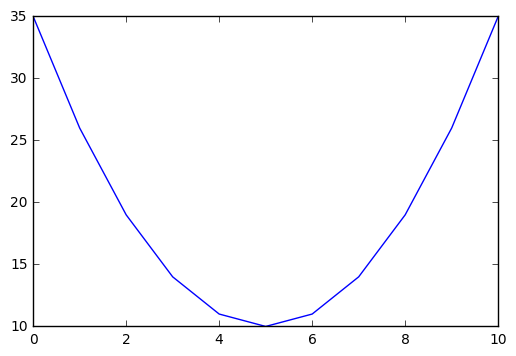

In [32]:
grafico1(map(seg_grau,gerador_simetrico(5)))

#### Observe ainda que podemos passar para map um conjunto de gráficos que queremos gerar

[None, None]

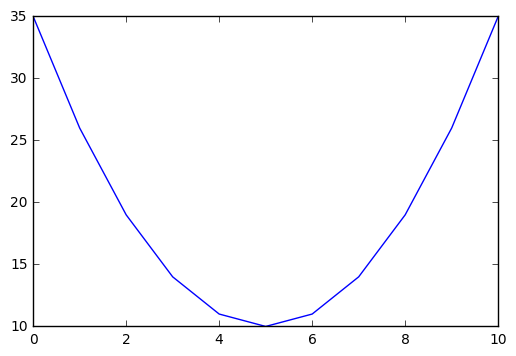

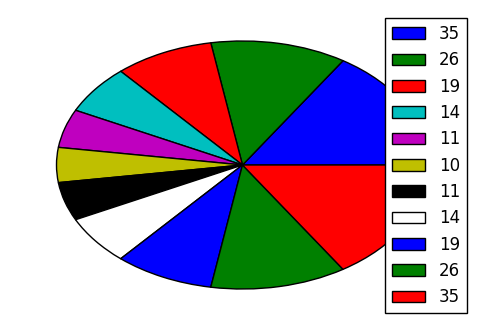

In [33]:
gerador_graficos=[grafico1,grafico2]
map(lambda grafico:grafico(map(seg_grau,gerador_simetrico(5)))
    ,gerador_graficos)


#### Resumindo temos:

    map(
        lambda variavel:variavel(
                    map(
                        pow(numero,2)+10,
                        lambda x:range(-x,x+1)
                   )
            )
        ,lista_de_graficos)

Manualmente teriamos que fazer o seguinte codigo

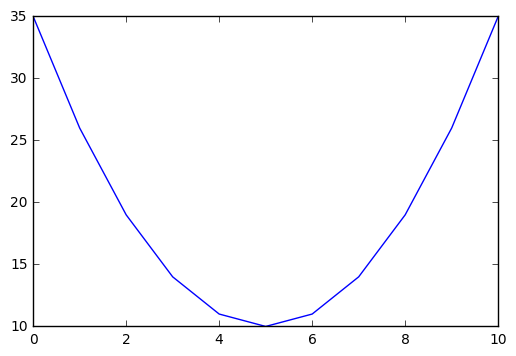

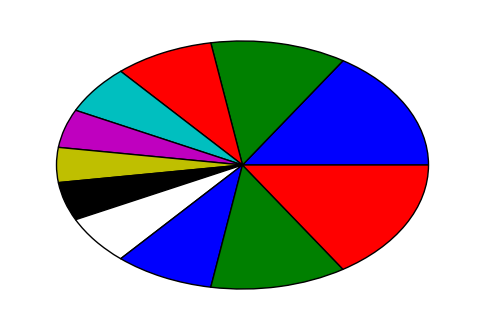

In [34]:
res_funcao=[]
lista_dados=range(-5,5+1)
for numero in lista_dados:
    res_funcao.append(pow(numero,2)+10)
plt.plot(res_funcao)
plt.figure()
plt.pie(res_funcao)
plt.figure()

Reverse:

In [35]:
 class Person(object):
        def __init__(self, name, age):
            self.name = name
            self.age = age

        def __repr__(self):
            return "<name: %s, age: %s>" % (self.name, self.age)

In [36]:
jack = Person('Jack', 19)
adam = Person('Adam', 43)
becky = Person('Becky', 11)
people = [jack, adam, becky]

In [38]:
sorted(people, #objeto analisado
       key=lambda  # chave lambda
       x: #objeto como funcao
       x.age, # parametro de ordenacao
       reverse=True) #opcional reverse

[<name: Adam, age: 43>, <name: Jack, age: 19>, <name: Becky, age: 11>]

Reference: 
* http://blog.alienretro.com/entendendo-python-lambda/ 
* http://www.secnetix.de/olli/Python/lambda_functions.hawk
